In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier

%matplotlib inline
plt.style.use('ggplot')
os.chdir('../src/')

In [2]:
from gp.models import GPBinaryClassifier
from gp.kernels import RBF

In [3]:
def f(t):
    return np.sin(2*np.pi*t)

def separator(x):
    if x[1] > f(x[0]):
        return 1
    else:
        return -1

In [4]:
n_train = 200
X = np.random.uniform(size=(n_train, 2))
y = np.array([
    separator(X[k,:]) for k in range(n_train)
])

n_test = 500
X_test = np.random.uniform(size=(n_test, 2))
y_test = np.array([
    separator(X_test[k,:]) for k in range(n_test)
])

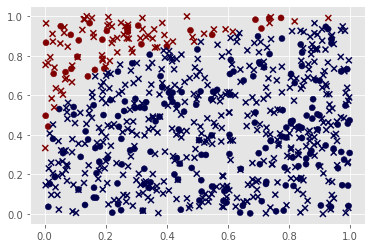

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='seismic', marker='x')

In [6]:
ker = RBF()
gpc = GPBinaryClassifier(ker)
gpc.get_param()

{'log_l': 0.0, 'log_sigma': 0.0}

In [7]:
gpc.fit(X, y)
gpc.log_marginal_likelihood()

-18.009536793055958

In [8]:
proba = gpc.predict(X_test)
y_pred = 2*(proba > .5) - 1

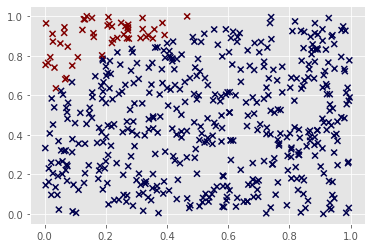

In [9]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='seismic', marker='x')

In [10]:
n_errors = 0
for i in range(n_test):
    if y_test[i] != y_pred[i]:
        n_errors += 1
print('percentage of errors: %.2f' % ((100.*n_errors)/n_test))

percentage of errors: 5.40
